#### Learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system.

#### We try to predict the future steps of a chaotic time series. For testing, we use the Echo State Network in "generative mode", which means, we do not have any input (only the bias) and the output is fed back into the network for producing the next time step.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

from echoes import ESNGenerative
from echoes.datasets import load_mackeyglasst17

sns.set(context="notebook", style="whitegrid", font_scale=1.4, 
        rc={'grid.linestyle': '--', 
            'grid.linewidth': 0.8,})

#### Instantiate the model: several parameter choices here are rather arbitrary and even not so conventional (e.g., spectral radius > 1), but this is just for the sake of the example. Many other constellations produce also satisfactory results, so feel free to play around with them.

In [3]:
esn = ESNGenerative(
    n_inputs=1,
    n_outputs=1,
    n_reservoir=200,
    spectral_radius=1.25,   
    teacher_forcing=True,
    leak_rate=.4,
    regression_params={
        "method": "pinv"  
    },
    random_seed=42,
)

In [4]:
# Load data and define train/test length
data = load_mackeyglasst17().reshape(-1, 1)
trainlen, testlen = 2000, 2000
totallen = trainlen + testlen
# Fit the model. Inputs is None because we only have the target time series
esn.fit(None, data[:trainlen]);   

In [5]:
# Input is None because we will use the generative mode, were only the feedback 
# is needed to compute the next states and predict outputs
prediction = esn.predict(n_steps=testlen)
print("test RSME:", np.sqrt(mean_squared_error(prediction.flatten(), 
                                               data[trainlen: totallen])))

test RSME: 0.1843091389540906


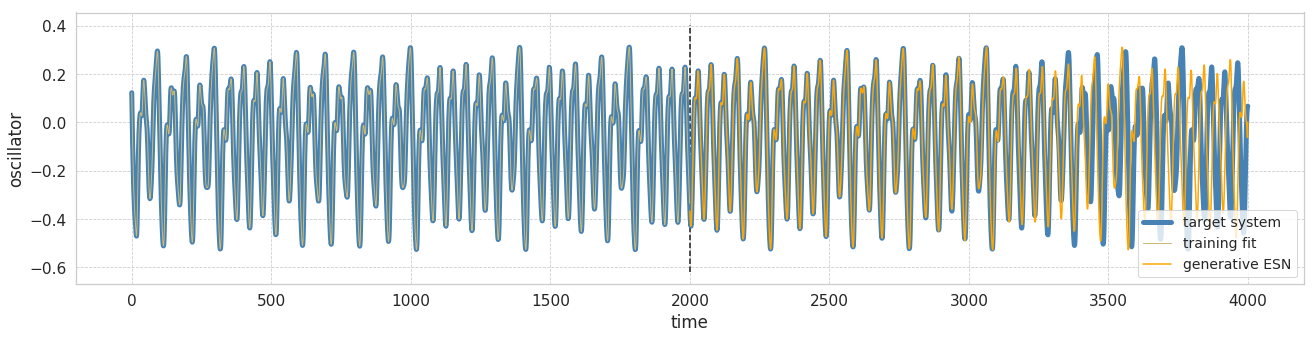

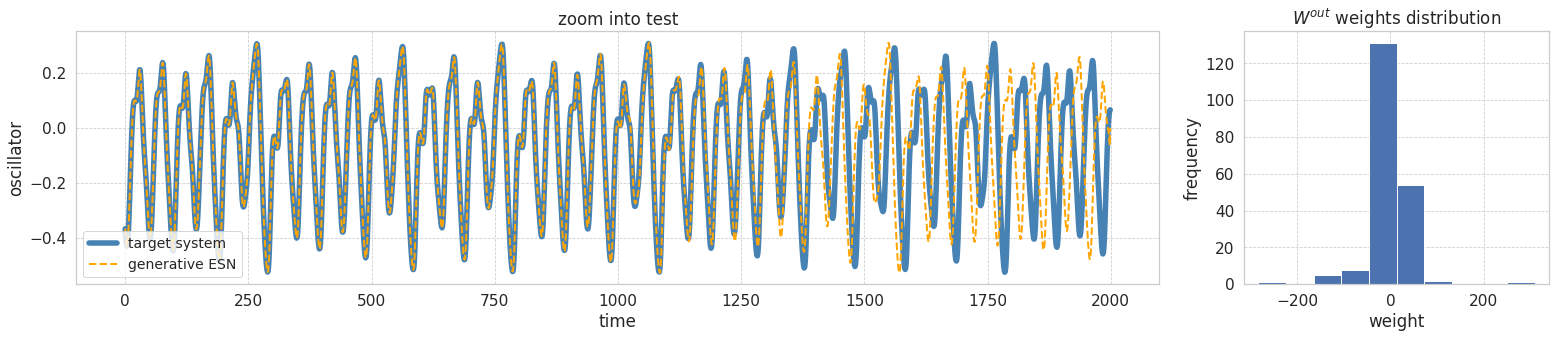

In [6]:
plt.figure(figsize=(22, 5))

# Plot training and test
plt.plot(data[: totallen],'steelblue', linewidth=5, label="target system")
plt.plot(esn.training_prediction_, color="y", linewidth=1, label="training fit")
plt.plot(range(trainlen, totallen), prediction,'orange', label="generative ESN")
plt.ylabel("oscillator")
plt.xlabel('time')
lo, hi = plt.ylim()
plt.vlines(trainlen, lo-.05, hi+.05, linestyles='--')
plt.legend(fontsize='small')

# Plot test
plt.figure(figsize=(22, 5))
plt.subplot(1, 4, (1, 3))
plt.title("zoom into test")
plt.plot(data[trainlen: totallen],
         color="steelblue",
         label="target system", 
         linewidth=5.5)
plt.xlabel('time')

plt.plot(prediction, 
         linestyle='--',
         color="orange", 
         linewidth=2,
         label="generative ESN",)
plt.ylabel("oscillator")
plt.xlabel('time')
plt.legend(fontsize='small')

plt.subplot(1, 4, 4)
plt.title(r"$W^{out}$ weights distribution")
plt.xlabel('weight')
plt.ylabel('frequency')
plt.hist(esn.W_out_.flat)
plt.tight_layout();